# MA124 Maths by Computer: Assignment 1

---

---

## A. Taylor series approximations (12 marks)

One can approximate $\sin(x)$ using a finite number of terms of a Taylor series:

$$
\sin(x) \simeq \sum_{n=0}^N (-1)^n\frac{x^{2n+1}}{(2n+1)!} 
$$

One can also approximate the natural logarithm $\ln(1+x)$ using a finite number of terms of a Taylor series:

$$
\log(1+x) \simeq \sum_{n=1}^N (-1)^{n+1} \frac{x^n}{n}
$$


Note that for a given $N$, there are $N+1$ terms of the sine series and the highest power of $x$ is $x^{2N+1}$, while there are $N$ terms for the $\ln(1+x)$ series and the highest power is $x^{N}$. 

**Assignment:** Explore how these approximations compare with the true sine and logarithm functions. 

Details: 

- Write two Python functions, with names of your choice, that compute the approximations to $\sin(x)$ and $\ln(1+x)$. Each function should have two arguments: `x` and `N`, where `x` is an np.array and `N` is an integer. The functions should return an np.array with the series approximation evaluated at `x`. 

- Write Python code to plot $\sin(x)$ for $x \in [-3\pi, 3\pi]$ and **on the same graph** plot the series approximations for all values of $N$ from 0 to some maximum value between 5 and 8. You can decide what you think looks nice. 

- Write Python code to plot $\log(1+x)$ for $x \in [-0.9, 2]$ and **on the same graph** plot the series approximations for all values of $N$ from 1 to some maximum value between 5 and 8. You can decide what you think looks nice and you do not need to use the same choice as for the sine function.

For both plots you will want to play with line weights, styles and/or colours to distinguish the true functions and approximate curves. You will also need to adjust the vertical plot limits to have informative plots. You may plot a grid or not as you think best. You are **not required to include a legend**. You can assume that the reader can understand the ordering of the curves with $N$ from their behaviour.

In [1]:
'this cell imports the required libraries'
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'this cell contains the function that approximates sin(x) for each value in the np.array() that is passed to it'
def sinApprox(x,N):
    y = [0] * x.shape[0]
    for K in range(len(x)):
        sum=0
        for J in range(0,N+1):
            sum = sum + (-1)**J * (x[K]**(2*J+1)) / np.math.factorial((2*J+1))
        y[K]=sum
    return np.array(y)

In [3]:
'this cell contains the function that approximates log(1+x) for each value in the np.array() that is passed to it'
def logApprox(x,N):
    y = [0] * x.shape[0]
    for K in range(len(x)):
        sum=0
        for J in range(1,N+1):
            sum = sum + (-1)**(J+1) * (x[K]**J) / J
        y[K]=sum
    return np.array(y)

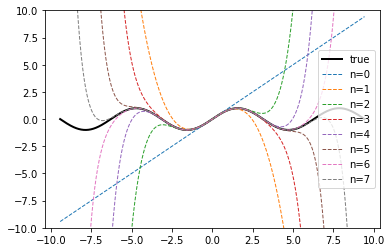

In [4]:
'''this cell plots the approximation of sin(x) (using the function above) for different values of N whilst keeping x
(the argument of the approximation function) the same
i.e for 𝑥∈[−0.9,2] and N=0,1,2,3.....7'''

x=np.linspace(-3*np.pi,3*np.pi,1000)
y=np.sin(x)

plt.ylim(-10,10)
plt.plot(x,y,label='true',color='black',lw=2)

for i in range(0,8):
        plt.plot(x,sinApprox(x,i), '--', label="n=" + str(i),lw=1)
        
plt.legend()
plt.show()



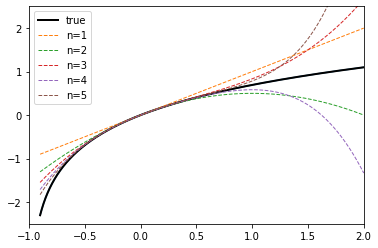

In [5]:
'''this cell plots the approximation of log(1+x) (using the approximation function above) for different values of N whilst keeping x
(the argument of the approximation function) the same
i.e for 𝑥∈[−3𝜋,3𝜋] and N=1,1,2,3.....5'''

x=np.linspace(-0.9,2,1000)
y=np.log(1+x)
        
plt.xlim(-1,2)
plt.ylim(-2.5,2.5)

plt.plot(x,y)

plt.plot(x,y,label='true',color='black',lw=2)
for i in range(1,6):
        plt.plot(x,logApprox(x,i), '--', label="n="+str(i),lw=1)

plt.legend()
plt.show()



## Hints

- The Wikipedia page on [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) contains plots that are what you are aiming for (although you are encouraged to produce plots in your own style). It is highly recommended that you skim that page for relevant material and in particular look at the [section on approximations](https://en.wikipedia.org/wiki/Taylor_series#Approximation_error_and_convergence).

- The NumPy and Matplotlib notebooks contain a worked example for the Taylor series approximation to of $\exp(x)$. You should first fully understand this example and then use it as a starting point.

#### Challenge section (worth 4 of the 12 marks)

Attempt this only after you have completed all other tasks.

Write Python code to make two plots showing the error in the Taylor series approximation to $\sin(x)$. The plots are as follows:

- Plot the absolute error $|\sin(x) - f_N(x)|$ as a function of $x$ for $x \in [-3\pi, 3\pi]$, where $f_N(x)$ is the series approximation. The plot should contain multiple curves corresponding to the values of $N$ you used above. 

- Produce a [log-log plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) of the absolute error $|\sin(x) - f_N(x)|$ as a function of $x$ for $x \in [0.2, 2\pi]$ for $N=0,1,2,3$. 

- Briefly interpret the two plots, especially the log-log plot. 

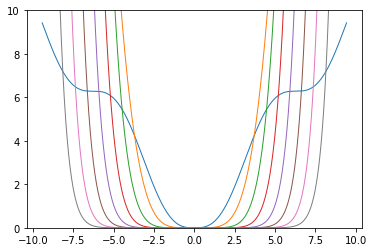

In [6]:
'''this cell plots the absolute error between sin(x) and its approximation (using the approximation function above) for different values of N whilst keeping x 
(the argument of the approximation function) the same
i.e when 𝑁=0,1,2,3......7 and 𝑥∈[−3𝜋,3𝜋]'''

x=np.linspace(-3*np.pi,3*np.pi,1000)

plt.ylim(0,10)

for i in range(8):
    y=abs(np.sin(x)-sinApprox(x,i))
    plt.plot(x,y, label="approx",lw=1)

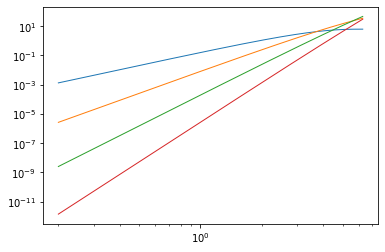

In [7]:
'''this cell plots the loglog plot of the absolute error between sin(x) and its approximation (using the apporximation function above) for different values of N
whilst keeping x the same
i.e when 𝑁=0,1,2,3 and 𝑥∈[0.2,2𝜋]'''

x=np.linspace(0.2,2*np.pi,1000)

for i in range(4):
    y=abs(np.sin(x)-sinApprox(x,i))
    plt.loglog(x,y, label="approx",lw=1)


'This cell is for the interpretation of the two plots, especially the log-log plot.'

The error starts lower for greater N.
For larger N the absolute error is lower.
For all N the error diverges as x increases.
The absolute error for greater N diverges faster as x increases.

---

## B. Parametric roller coaster (10 marks)

You will design and plot a roller coaster. For the purposes of this question, a roller coaster is a closed, embedded (non-self-intersecting) curve in $\mathbb R^3$, that has one "fun feature". These roller coasters do not have to make mechanical sense. For example, they can have sharp corners. However, they must be closed so that the passengers can get off where they got on. They cannot self-intersect for passenger safety. 

**Assignment:** Design and plot representative views of a roller coaster.

Details: 

- You are going to design your roller coaster in sections using parameterised curves. The design requirements are that the roller coaster must have 3 sections minimum and 6 maximum. There can be at most one straight section. One section must be a "fun feature", meaning that it looks fun, so at a minimum this section does not lie in a plane. 

- Your submission should contain a mathematical description of the sections of your roller coaster in the form:
$$
x_1(t) = \cdots, y_1(t) = \cdots, z_1(t) = \cdots, \quad t \in [\cdots] 
$$
$$
x_2(t) = \cdots, \qquad \cdots, \qquad \cdots, \qquad  \qquad 
$$
$$
\vdots
$$

    followed by plots of the full roller coaster from various viewpoints.  
    
- Your Python code must print the coordinates of the first and last point of each section of your roller coaster. This way it will be clear to the marker that the last point of section $n$ is the same as the first point of section $n+1$. Do not print all the points on your parameterised curves, only the first and last. 
  
Marks will be awarded for creativity, both in design and presentation. 

Here are my functions

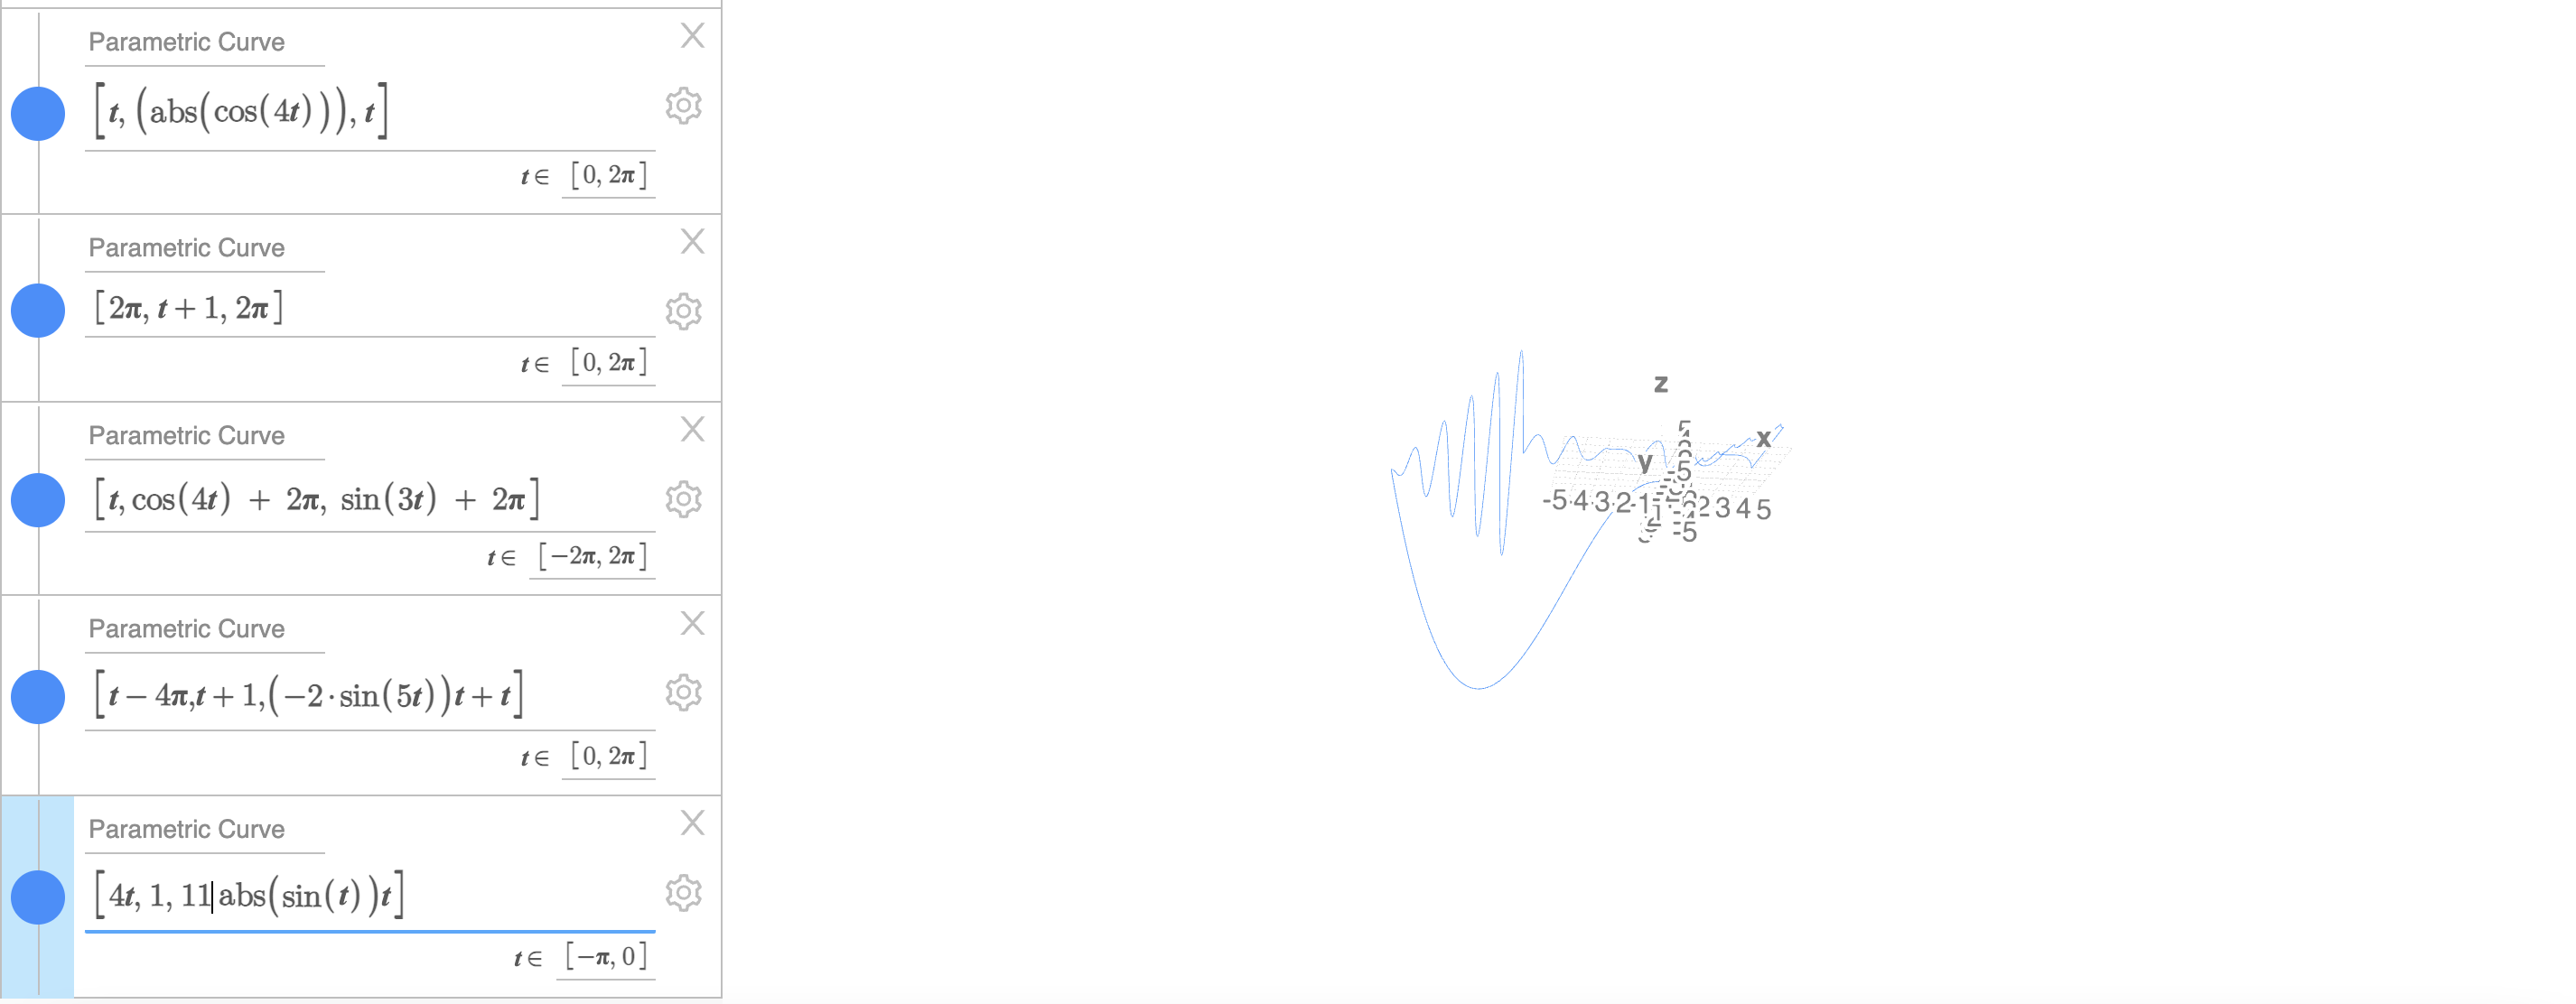

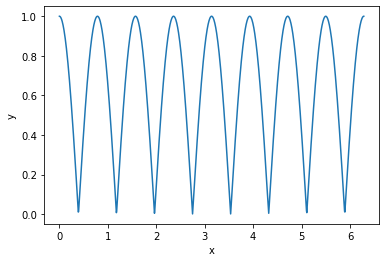

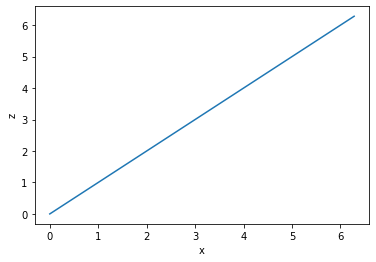

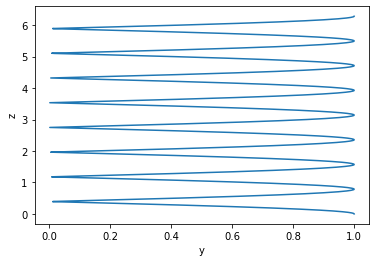

0.0 1.0 0.0
6.283185307179586 1.0 6.283185307179586


In [8]:
'this cell defines the 1st function I used for my rollercoaster and plots the different points of view accordingly'
'and prints the first and last co-ordinate of the function'

t1 = np.linspace(0,2*np.pi,1000)
x1 = t1
y1 = (np.absolute((np.cos(4*t1))))
z1 = t1

plt.plot(x1,y1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(x1,z1)
plt.xlabel("x")
plt.ylabel("z")
plt.show()

plt.plot(y1,z1)
plt.xlabel("y")
plt.ylabel("z")
plt.show()

print(x1[0],y1[0],z1[0])
print(x1[-1],y1[-1],z1[-1])


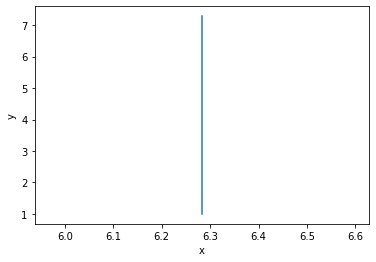

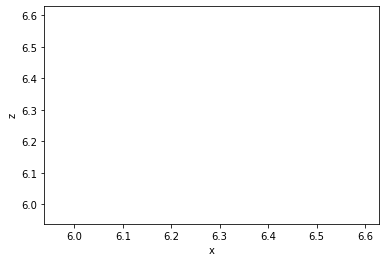

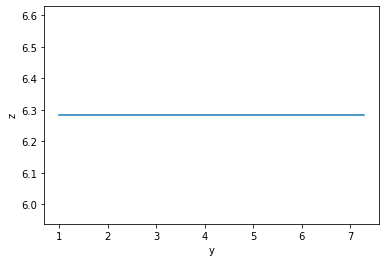

6.283185307179586 1.0 6.283185307179586
6.283185307179586 7.283185307179586 6.283185307179586


In [9]:
'this cell defines the second function I used for my rollercoaster and plots the different points of view accordingly'
'and prints the first and last co-ordinate of the function'

t2 = np.linspace(0,2*np.pi,1000)
x2 = 2*np.pi + np.zeros(t2.shape)
y2 = t2 + 1
z2 = 2*np.pi + np.zeros(t2.shape)


plt.plot(x2,y2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


plt.plot(x2,z2)
plt.xlabel("x")
plt.ylabel("z")
plt.show()


plt.plot(y2,z2)
plt.xlabel("y")
plt.ylabel("z")
plt.show()

print(x2[0],y2[0],z2[0])
print(x2[-1],y2[-1],z2[-1])

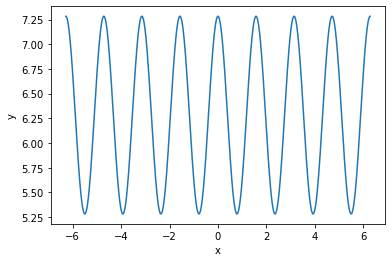

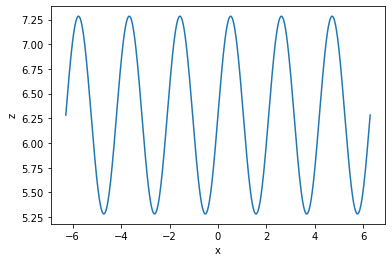

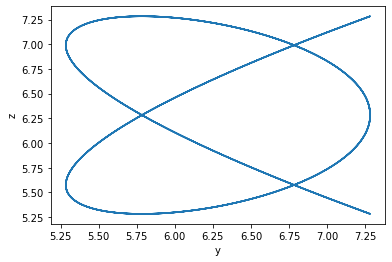

-6.283185307179586 7.283185307179586 6.283185307179587
6.283185307179586 7.283185307179586 6.283185307179585


In [10]:
'this cell defines the third function I used for my rollercoaster and plots the different points of view accordingly'
'and prints the first and last co-ordinate of the function'

t3 = np.linspace(-2*np.pi,2*np.pi,1000)
x3 = t3
y3 = np.cos(4*t3) + 2*np.pi
z3 = np.sin(3*t3) + 2*np.pi

plt.plot(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(x3,z3)
plt.xlabel("x")
plt.ylabel("z")
plt.show()

plt.plot(y3,z3)
plt.xlabel("y")
plt.ylabel("z")
plt.show()

print(x3[0],y3[0],z3[0])
print(x3[-1],y3[-1],z3[-1])

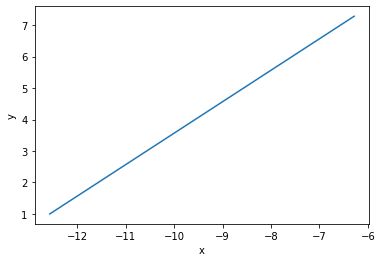

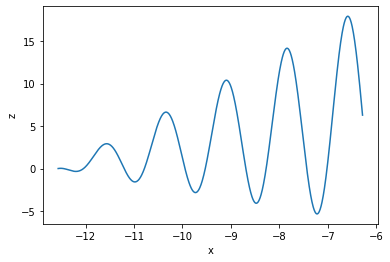

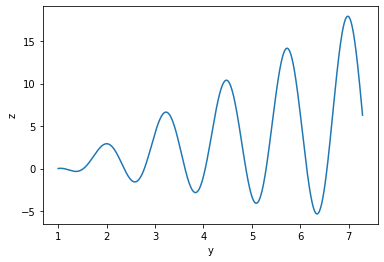

-12.566370614359172 1.0 0.0
-6.283185307179586 7.283185307179586 6.283185307179601


In [11]:
'this cell defines the fourth function I used for my rollercoaster and plots the different points of view accordingly'
'and prints the first and last co-ordinate of the function'

t4 = np.linspace(0,2*np.pi,1000)
x4 = t4 - 4*np.pi
y4 = t4 + 1
z4 = ((-2*np.sin(5*t1))*t4) + t4

plt.plot(x4,y4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(x4,z4)
plt.xlabel("x")
plt.ylabel("z")
plt.show()

plt.plot(y4,z4)
plt.xlabel("y")
plt.ylabel("z")
plt.show()

print(x4[0],y4[0],z4[0])
print(x4[-1],y4[-1],z4[-1])

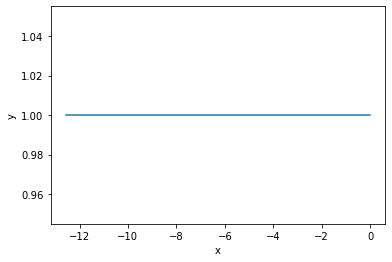

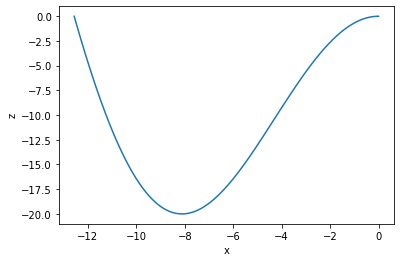

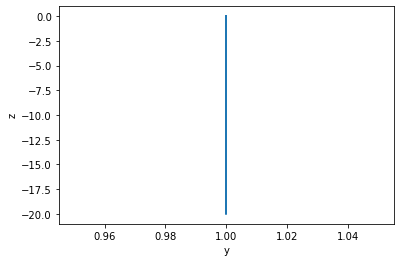

-12.566370614359172 1.0 -4.232075526187938e-15
0.0 1.0 0.0


In [12]:
'this cell defines the fifth function I used for my rollercoaster and plots the different points of view accordingly'
'and prints the first & last co-ordinate of the function'

t5 = np.linspace(-np.pi,0,1000)
x5 = 4*t5
y5 = 1 + np.zeros(t5.shape)
z5 = 11*np.absolute(np.sin(t5))*t5

plt.plot(x5,y5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(x5,z5)
plt.xlabel("x")
plt.ylabel("z")
plt.show()

plt.plot(y5,z5)
plt.xlabel("y")
plt.ylabel("z")
plt.show()

print(x5[0],y5[0],z5[0])
print(x5[-1],y5[-1],z5[-1])

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
'%matplotlib'


ax=plt.axes(projection = '3d')
'''ax.set_zlim(-2*np.pi,2*np.pi)
ax.set_xlim(-2*np.pi,2*np.pi)
ax.set_ylim(-2*np.pi,2*np.pi)'''
ax.plot(x1,y1,z1)
ax.plot(x2,y2,z2)
ax.plot(x3,y3,z3)

ax.plot(x4,y4,z4)

ax.plot(x5,y5,z5)
plt.show()


Hints:

- First review and understand the plotting of the helix in the Matplotlib notebook.  This is a useful starting point even if you choose not to use the helix in your roller coaster. 

- We suggest getting a basic roller coaster with just 3 sections first before trying anything fancy. 

- Python will be your friend in designing your roller coaster. Work one section at a time. Since you are required to print the first and last points of each segment, it will be obvious from the output when sections to line up end to end. Continue to work section by section and make sure the end point of the last section matches the first point of the first section. 

- After you have perfected your roller coaster in Python, it should be straightforward to state mathematically the parameterisation of each section. 

- Finally, you want to plot it the whole roller coaster. (Do not produce numerous plots of individual sections.) Use subplots to show more than one view. Consider [this sketch of a chair](http://chairnotes.blogspot.com/2007/10/drawing.html) and Google "orthographic views". You may explore making 3D plots in Python. However, for consistency in the submissions, you should only submit 2D plots. 

Note, because computers work with only a finite number of digits, even when the points match, you may obverve tiny differences in printed values, e.g., in my model solution the point $(\pi, 0, 0)$ is printed first as:

```
6.283185307179586 0.0 0.0
```
and then as
```
6.283185307179586 -3.8473413874435795e-16 0.0
```

The $y$ coordinate of the second is of size $10^{-16}$ and so approximately zero. Ignore such tiny differences.

---

## Further 3 marks

A further 3 marks will be awarded for each assignment based on overall quality and clarity of the submitted notebook. 

---

## Submission

You will submit a single Jupyter notebook. 

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose one mark if you submit a notebook that has not been run.**

- A template is provided to get you started. Please remove all <font color='red'>red text</font> from the template before submission.

- A good guide for what the final notebook should be like is: if the notebook is run and all code cells are collapsed, the notebook should be readable as a **short** report, primarily consisting of a short intro to each section followed by figures and descriptions of the figures. Think of the Markdown content as extended figure captions. In later assignments you may need to discuss numerical methods, but not in this first assignment. 

- Each code cell should begin with a comment line or lines concisely stating what the cell is for. Functions should have comments or docstrings describing what they do. One assumes the reader understands Python. Add comments to set off blocks of code or to note anything tricky. In most cases Python code explains itself and does not need comments.


---

## Warnings

- Do not wait until the last minute to work on this assignment!

- You should download Template1.ipynb from the Moodle page, edit it in JupyterLab to at least to put in your student number, and save the edited version (maybe also rename the notebook). **Make certain that you can do all these things now, while there is time to resolve any issues during the computer labs. This is especially true if you are running JupyterLab on Azure**. Help is available, but not if you wait until the last minute.

- It is your responsibility to backup your work and submit the assignment by the deadline.

---